# Analysis for Sucides in India form 2001 to 2012

---


![picture](https://cdn.pixabay.com/photo/2015/06/28/23/02/depression-824998_960_720.jpg)


Suicide is the most common reason for death in India. Every year the suicide rate is increasing dramatically. So analyzing suicide in India is an interesting and knowledgable one. 

We have a dataset from *Kaggle*, from the range of 2001 to 2012 for every 28 states and every 7 union territories. And Telangana becomes a state in India in 2014 so we don't have the data for Telangana. 

This dataset contains 237,519 rows and 7 columns :
* **State** - Contains the name of each State and Union Territory in India
* **Year** - Contains every year from  2001 to 2012
* **Type Code** - It contains the value that explains the what the Type is like if Type explains about the causes for suicide, Type code contain Causes heading
* **Type** - This column contain, why the people die, what are their educational qualification, about their social status, and professional profile
* **Gender** - This column contains values about their gender Male or Female
* **Age Group** - This column contain values about their age
* **Total** - This column contains, the total value of how many people suicide.

We are going to analyze this dataset to understand what was going on there, why people decide to end their life, what are the reasons, and many more. In a nutshell, we are going to understand this data from very top to bottom using Python

For understanding the data, we are going to use some of the libraries or frameworks or modules whatever you want to name it. 

* **opendatasets** - opendatasets is the tool to download the Kaggle dataset from the website with one click
* **NumPy** - NumPy is used for numerical computing in the dataset
* **Pandas** - Pandas is the most popular tool for analyzing the Tabular Data and Pandas was built on NumPy
* **Matplotlib** - Matplotlib the basic tool to visualize the database, This can be useful for basic plotting
* **Seaborn** - Seaborn is the advanced tool for visualizing the data with easy steps, Seaborn is built on Matplotlib

## Downloading the Dataset

Let's download the dataset from *Kaggle* using the opendatasets library

In [1]:
# Let's install the opendatasets library before importing
!pip install opendatasets  --upgrade --quiet

In [2]:
# Let's import opendatasets
import opendatasets as od
od.download('https://www.kaggle.com/rajanand/suicides-in-india/data')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: kannanravindran
Your Kaggle Key: ··········


100%|██████████| 1.25M/1.25M [00:00<00:00, 108MB/s]

This opendatasets ask the Kaggle username and Kaggle Key from your Kaggle account, you can find that in [Your Kaggle Acount](https://www.kaggle.com/)

## Data Preparation and Cleaning

In this step, we are going to prepare the data for visualization purpose, that means to delete the unwanted rows and checking the rows and checking how many columns and rows we have in dataset. We can get the full overview of the dataset




Let's begin by importing the `NumPy` and `Pandas` library first

In [3]:
# Let's import 
import numpy as np
import pandas as pd

let's take a look at the dataset that we have. Using `pd.read_csv(file_path)` method

In [4]:
suicide_df = pd.read_csv('/content/suicides-in-india/Suicides in India 2001-2012.csv')
suicide_df

,State,Year,Type_code,Type,Gender,Age_group,Total
0,A & N Islands,2001,Causes,Illness (Aids/STD),Female,0-14,0
1,A & N Islands,2001,Causes,Bankruptcy or Sudden change in Economic,Female,0-14,0
2,A & N Islands,2001,Causes,Cancellation/Non-Settlement of Marriage,Female,0-14,0
3,A & N Islands,2001,Causes,Physical Abuse (Rape/Incest Etc.),Female,0-14,0
4,A & N Islands,2001,Causes,Dowry Dispute,Female,0-14,0
...,...,...,...,...,...,...,...
237514,West Bengal,2012,Social_Status,Seperated,Male,0-100+,149
237515,West Bengal,2012,Social_Status,Widowed/Widower,Male,0-100+,233
237516,West Bengal,2012,Social_Status,Married,Male,0-100+,5451
237517,West Bengal,2012,Social_Status,Divorcee,Male,0-100+,189


Now we can see, we have 237519 rows and 7 columns. That's huge right.

Let's check the shape to confirm that we are see the correct rows and column

Let's check the rows and column using `df_var_name.shape`

In [5]:
suicide_df.shape

(237519, 7)

Now let's check the basic information of the data frame using `df_var_name.info()`

In [6]:
suicide_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237519 entries, 0 to 237518
Data columns (total 7 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   State      237519 non-null  object
 1   Year       237519 non-null  int64 
 2   Type_code  237519 non-null  object
 3   Type       237519 non-null  object
 4   Gender     237519 non-null  object
 5   Age_group  237519 non-null  object
 6   Total      237519 non-null  int64 
dtypes: int64(2), object(5)
memory usage: 12.7+ MB


We can see now, The Year column and Total column is the `integer64` datatype, then we have the `object` datatype.

And this clearly shows there is `non-null values`, that means we don't have any null values in datasets 

Now let's check whether the State column have any duplicate values, using `df_var_name.column_name.unique()`

In [7]:
suicide_df.State.unique()

array(['A & N Islands', 'Andhra Pradesh', 'Arunachal Pradesh', 'Assam',
       'Bihar', 'Chandigarh', 'Chhattisgarh', 'D & N Haveli',
       'Daman & Diu', 'Delhi (Ut)', 'Goa', 'Gujarat', 'Haryana',
       'Himachal Pradesh', 'Jammu & Kashmir', 'Jharkhand', 'Karnataka',
       'Kerala', 'Lakshadweep', 'Madhya Pradesh', 'Maharashtra',
       'Manipur', 'Meghalaya', 'Mizoram', 'Nagaland', 'Odisha',
       'Puducherry', 'Punjab', 'Rajasthan', 'Sikkim', 'Tamil Nadu',
       'Total (All India)', 'Total (States)', 'Total (Uts)', 'Tripura',
       'Uttar Pradesh', 'Uttarakhand', 'West Bengal'], dtype=object)

We have `Total (All India)` and `Total (States)` and `Total (Uts)`. This represents the total value of all over India, and for every state and every Union Territory.

This will be useful but when we do total but it will make some value miscalculation when we add the total values of the year or particular Type or Type Code

I think removing this will be great for our analysis, but what if we need this for later, so let's create the separate data frame for those three values and remove that in our data frame.

In [8]:
# Create the dataframe for Total (All India)
suicide_df_india = suicide_df[suicide_df.State == 'Total (All India)']

# Create the dataframe for Total (States)
suicide_df_states = suicide_df[suicide_df.State == 'Total (States)']

# Create the dataframe for Total (Uts)
suicide_df_uts = suicide_df[suicide_df.State == 'Total (Uts)']

* So now we have a separate data frame for the 3 unwanted sections...

* It's time to remove those rows

* But Before deleting or changing the values from the Original Dataset, it's *good practice* (I think) to create a copy of the dataset for safety (Because we can screw the data frame values and we have to start from the first or you have to read the file again using pandas like me).

In [9]:
# Create the copy of original dataframe
suicide_df_copy = suicide_df.copy()

Now delete the values from the original data frame using the `drop` method

I am deleting the row index wise because I know the index of the row that I want to delete

In [10]:
# Deleting the dataframe using index value
suicide_df.drop(suicide_df.index[range(209476, 210412)], inplace=True)

In [11]:
# If we see that, those 3 values are deleted
suicide_df.State.unique()

array(['A & N Islands', 'Andhra Pradesh', 'Arunachal Pradesh', 'Assam',
       'Bihar', 'Chandigarh', 'Chhattisgarh', 'D & N Haveli',
       'Daman & Diu', 'Delhi (Ut)', 'Goa', 'Gujarat', 'Haryana',
       'Himachal Pradesh', 'Jammu & Kashmir', 'Jharkhand', 'Karnataka',
       'Kerala', 'Lakshadweep', 'Madhya Pradesh', 'Maharashtra',
       'Manipur', 'Meghalaya', 'Mizoram', 'Nagaland', 'Odisha',
       'Puducherry', 'Punjab', 'Rajasthan', 'Sikkim', 'Tamil Nadu',
       'Tripura', 'Uttar Pradesh', 'Uttarakhand', 'West Bengal'],
      dtype=object)

Let's check the shape using `df_var_name.shape` to confirm, is the values really deleted

In [12]:
suicide_df.shape

(236583, 7)

First, we have 237519 rows now we have 236583 rows, now we are successfully deleted 936 rows.

Now let's check the sample of the data frame using `df_var_name.sample(value)`

In [13]:
suicide_df.sample(10)

,State,Year,Type_code,Type,Gender,Age_group,Total
177806,Puducherry,2004,Professional_Profile,House Wife,Male,15-29,0
144947,Manipur,2006,Causes,Physical Abuse (Rape/Incest Etc.),Female,45-59,0
155392,Meghalaya,2012,Professional_Profile,Service (Private),Female,60+,0
48905,D & N Haveli,2003,Professional_Profile,Public Sector Undertaking,Male,30-44,0
207065,Tamil Nadu,2008,Means_adopted,By Drowning,Female,60+,22
144073,Manipur,2004,Means_adopted,By Jumping from (Building),Female,60+,0
97147,Jammu & Kashmir,2005,Means_adopted,By Consuming Other Poison,Male,0-14,1
21329,Assam,2002,Professional_Profile,Professional Activity,Male,60+,0
217185,Tripura,2012,Social_Status,Never Married,Female,0-100+,73
216031,Tripura,2010,Professional_Profile,Retired Person,Female,60+,0


### Working with incorrect data
I go through some sample and find out two values are duplicated in the Type column ... Let me show you

In [14]:
# Checking for the duplicate value in the Means adopted section
suicide_df[suicide_df.Type_code == 'Causes'].Type.value_counts()

Love Affairs                                      4200
Poverty                                           4200
Property Dispute                                  4200
Other Causes (Please Specity)                     4200
Cancer                                            4200
Death of Dear Person                              4200
Paralysis                                         4200
Causes Not known                                  4200
Cancellation/Non-Settlement of Marriage           4200
Physical Abuse (Rape/Incest Etc.)                 4200
Professional/Career Problem                       4200
Insanity/Mental Illness                           4200
Other Prolonged Illness                           4200
Illness (Aids/STD)                                4200
Unemployment                                      4200
Dowry Dispute                                     4200
Suspected/Illicit Relation                        4200
Divorce                                           4200
Fall in So

What we do in the above code is, we filter the suicide data frame with Type code only have Causes rows, and check how many values are in every unique value...

Here we can see `Bankruptcy or Sudden change in Economic` and `Bankruptcy or Sudden change in Economic Status` are both looks the same but it separated by `Status` word probably this is a typo

And another one is `Not having Children(Barrenness/Impotency` and `Not having Children (Barrenness/Impotency` both are looks same but it differ by the space maybe this is also a typo

So let's change the typo values one by one

In [15]:
# Let's change Bankruptcy or Sudden change in Economic value
suicide_df.replace(to_replace='Bankruptcy or Sudden change in Economic', value= 'Bankruptcy or Sudden change in Economic Status', inplace=True)

# Let's change Not having Children(Barrenness/Impotency -- This doesn't a have close bracket so let's add here
suicide_df.replace(to_replace='Not having Children(Barrenness/Impotency', value= 'Not having Children(Barrenness/Impotency)', inplace=True)

# Let's change Not having Children (Barrenness/Impotency -- This doesn't have space and close bracket so let's add here
suicide_df.replace(to_replace='Not having Children (Barrenness/Impotency', value= 'Not having Children(Barrenness/Impotency)', inplace=True)

I think now both are changed let's see the that to confirm that


In [16]:
# Checking to confirm the values are changed or not
suicide_df[suicide_df.Type_code == 'Causes'].Type.value_counts()

Love Affairs                                      4200
Failure in Examination                            4200
Property Dispute                                  4200
Other Causes (Please Specity)                     4200
Cancer                                            4200
Death of Dear Person                              4200
Paralysis                                         4200
Causes Not known                                  4200
Cancellation/Non-Settlement of Marriage           4200
Physical Abuse (Rape/Incest Etc.)                 4200
Professional/Career Problem                       4200
Insanity/Mental Illness                           4200
Other Prolonged Illness                           4200
Poverty                                           4200
Illness (Aids/STD)                                4200
Bankruptcy or Sudden change in Economic Status    4200
Unemployment                                      4200
Dowry Dispute                                     4200
Suspected/

In the above series shows, that we change the miss-typed two values and that value becomes one to show the whole 4200 values in every unique value in the Type section

Let's check how many people suicide from 2001 to 2012

In [78]:
print(suicide_df.Total.sum(), "People's commit suicide")

7248010 People's commit suicide


Let's check last one time in the sample values

In [17]:
suicide_df.sample(10)

,State,Year,Type_code,Type,Gender,Age_group,Total
23324,Assam,2006,Means_adopted,By Jumping from (Building),Female,0-14,0
155241,Meghalaya,2012,Means_adopted,By Jumping from (Building),Male,45-59,0
17078,Arunachal Pradesh,2007,Causes,Other Causes (Please Specity),Male,60+,3
69966,Goa,2005,Causes,Not having Children(Barrenness/Impotency),Female,60+,0
179912,Puducherry,2008,Means_adopted,By Jumping off Moving Vehicles/Trains,Male,15-29,0
236701,West Bengal,2011,Means_adopted,By touching electric wires,Male,0-14,3
197702,Sikkim,2004,Causes,Unemployment,Female,15-29,0
76144,Gujarat,2004,Causes,Divorce,Male,45-59,7
27229,Bihar,2001,Causes,Not having Children(Barrenness/Impotency),Female,60+,0
96949,Jammu & Kashmir,2005,Causes,Poverty,Male,15-29,0


## Exploratory Analysis and Visualization

Until now, we prepare our dataset for this *visualization process*. Here we are going to see the relationship of the columns with the graph, plot, chart.  We can visualize every column in the dataset and get a complete understanding of suicides in India from 2001 to 2012.

First, let's import the library's for visualization

In [18]:
# importing the libraries and setting the grid style, font size, figure size, facecolour
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

### Sucide total with respective States and Union Territory

Let's see how many people commit suicide from 2001 to 2012 for every state and Union Territories  in India

In [19]:
suicide_state = suicide_df.groupby('State')['Total'].sum()
suicide_state_df = pd.DataFrame(suicide_state).reset_index().sort_values('Total',ascending=False)
suicide_state_df

,State,Total
20,Maharashtra,901945
34,West Bengal,849936
30,Tamil Nadu,818691
1,Andhra Pradesh,814059
16,Karnataka,734825
17,Kerala,538946
19,Madhya Pradesh,451535
11,Gujarat,330858
6,Chhattisgarh,302354
25,Odisha,267234


If you see the above data frame it is clear to see the persons that commit suicide in the every state, But it's not much friendly so let's plot the graph to make it much friendly

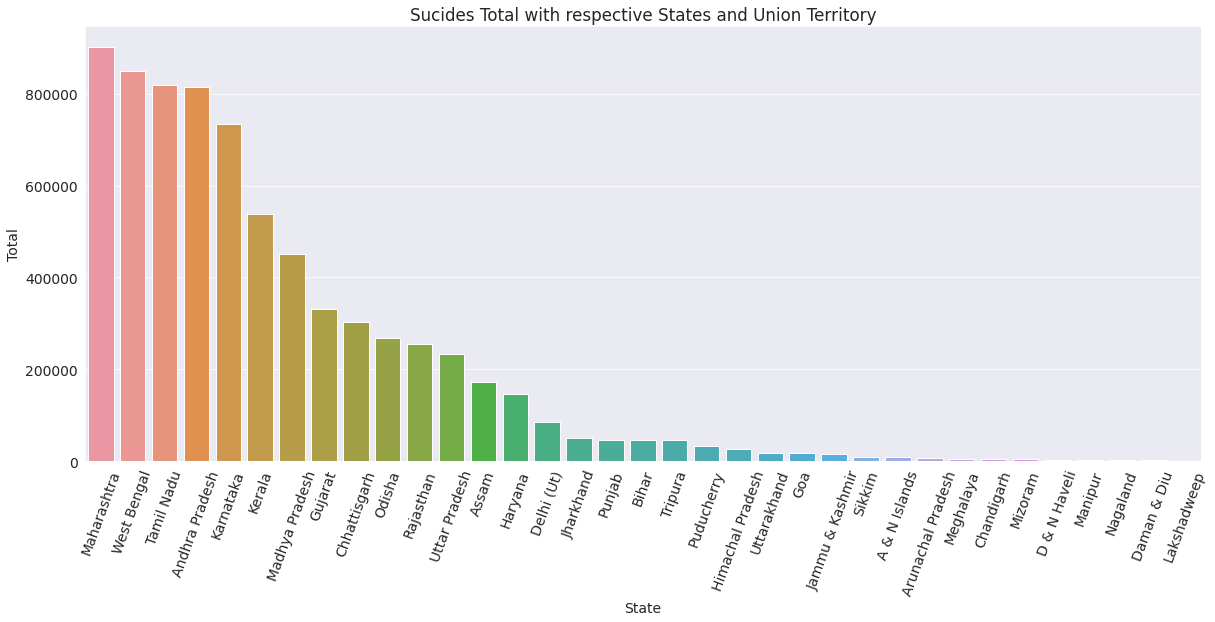

In [20]:
plt.figure(figsize=(20,8))
plt.title('Sucides Total with respective States and Union Territory')
plt.xticks(rotation = 70)
sns.barplot(x='State', y= 'Total', data=suicide_state_df);

Now it's pretty clear, *Maharastra, West Bengal, Tamil Nadu, Andhra Pradesh, Karnataka* holds the high rate in the year from 2001 to 2012 than most of the others
Some of the state's hold a very low suicide history like *Lakshadweep*, it has only 50 suicide, that great.

### Gender

Let's look at which gender commit suicide the most in overall India

In [21]:
total_gender = suicide_df.groupby('Gender')['Total'].sum()
total_gender_df = pd.DataFrame(total_gender).reset_index()
total_gender_df

,Gender,Total
0,Female,2606922
1,Male,4641088


Above dataset shows that Male people commit suicide more than Female, I think it's because of the work pressure or some problem in the family and maybe lending problems

Let's look at this with the pie chart to understand with percentage and more

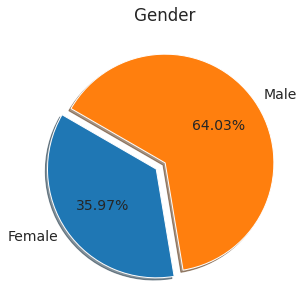

In [22]:
plt.title('Gender')
explode = (0.1,0)
plt.pie(total_gender_df.Total, explode=explode,labels = total_gender_df.Gender, autopct='%1.2f%%', shadow= True, startangle=150);

The Above Pie chart shows *Male* percentage is 30 percent higher than the *female* percent...

But the biggest problem is, no one talk about *Male* in the Society

### Total suicide with every state and every year

Let's view the suicide commit total for every year and every state...

For this type of usecasse, we can use the Heatmap to get the clear view

Before using heatmap we have to make our data frame in matrix form.

In [23]:
# Let's make the dataframe in the matrix form for heatmap
suicide_state_year = suicide_df.groupby(['State', 'Year'])['Total'].sum()
suicide_state_year_df = pd.DataFrame(suicide_state_year).reset_index()
suicide_heatmap_df = suicide_state_year_df.pivot(index="State", columns= "Year")

 We create the data frame in matrix form, but if it does not align form low to high or high to low we don't get the clear view in *Heatmap* so we have to sort the values

But now we don't have the stable values to sort the data frame so we are going to add those values and create a new column and store those values in the column and then we can sort the data frame with respective to sum

In [24]:
# Let's add the total value and store it in the new column in the name of sum
suicide_heatmap_df['sum'] = suicide_heatmap_df.sum(axis = 1)

# Then sort the vlaues with respective for sum
suicide_heatmap_sortt_df =  suicide_heatmap_df.sort_values('sum', ascending=False)

# Now our data frame is sorted , we don't need our sum valus we can no dismantle or drop the sum column
final_suicide_heatmap_df = suicide_heatmap_sortt_df.drop(['sum'], axis=1)
final_suicide_heatmap_df

Total                       ...                            
Year                2001   2002   2003   2004  ...   2009   2010   2011   2012
State                                          ...                            
Maharashtra        73090  72645  73800  73645  ...  71500  79580  79735  80560
West Bengal        68450  65035  66400  67035  ...  73240  80185  82460  44871
Tamil Nadu         56450  56134  59360  64195  ...  71832  82805  79815  84635
Andhra Pradesh     52610  58465  57045  67630  ...  72500  79505  75385  71190
Karnataka          59405  61350  61805  59685  ...  60975  63255  63110  63765
Kerala             47860  49050  47190  45265  ...  43775  42930  41421  42450
Madhya Pradesh     34300  34495  33810  33975  ...  45565  45015  46295  48875
Gujarat            23955  23216  22830  23868  ...  30779  31035  31910  35550
Chhattisgarh       20051  19750  19595  22475  ...  29415  32563  33780  28270
Odisha             20254  21940  22100  21075  ...  21825  21275  26205  25135
Rajasthan          15975  16240  18305  18625  ...  25325  24600  21740  24105
Uttar Pradesh      17580  21250  18315  18185  ...  20790  18140  24195  22107
Assam              13230  12550  12963  14178  ...  14830  14965  13630  16320
Haryana            10031  11000  11135  10410  ...  12515  14470  16225  14135
Delhi (Ut)          6195   5265   5765   6277  ...   7385   7713   8580   9494
Jharkhand           1250   1360   1360   2085  ...   5550   6158   6060   6595
Punjab              3240   2535   3155   3225  ...   4235   4600   4830   5150
Bihar               3015   3600   2984   1755  ...   5255   6130   3975   3795
Tripura             4270   3891   4220   3850  ...   3689   3625   3515   4220
Puducherry          2645   2835   2910   2694  ...   2590   2540   2785   2705
Himachal Pradesh    1535   1670   1926   1840  ...   2800   2703   2214   2636
Uttarakhand         1555   1805   1953   1185  ...   1710   1402   1585   2120
Goa                 1280   1545   1500   1570  ...   1382   1610   1465   1445
Jammu & Kashmir      765    919    690    560  ...   1602   1295   1432   2070
Sikkim               470    383    525    488  ...   1204   1400    916    905
A & N Islands        645    720    565    610  ...    655    780    680    605
Arunachal Pradesh    555    570    405    395  ...    549    655    670    646
Meghalaya            435    332    205    275  ...    557    537    761    640
Chandigarh           350    435    515    375  ...    374    355    525    567
Mizoram              270    330    260    300  ...    339    380    450    857
D & N Haveli         250    250    260    195  ...    280    315    315    330
Manipur              205    195    130    204  ...    134    185    165    205
Nagaland             200    135    109    155  ...    153     60    165    150
Daman & Diu           69     85    118     65  ...    115    155    165    180
Lakshadweep            0      0     10      0  ...      5      5      0      5

[35 rows x 12 columns]

Now our data frame had every year of suicide count and it points to the states clearly, and our dat frame is ready for heatmap

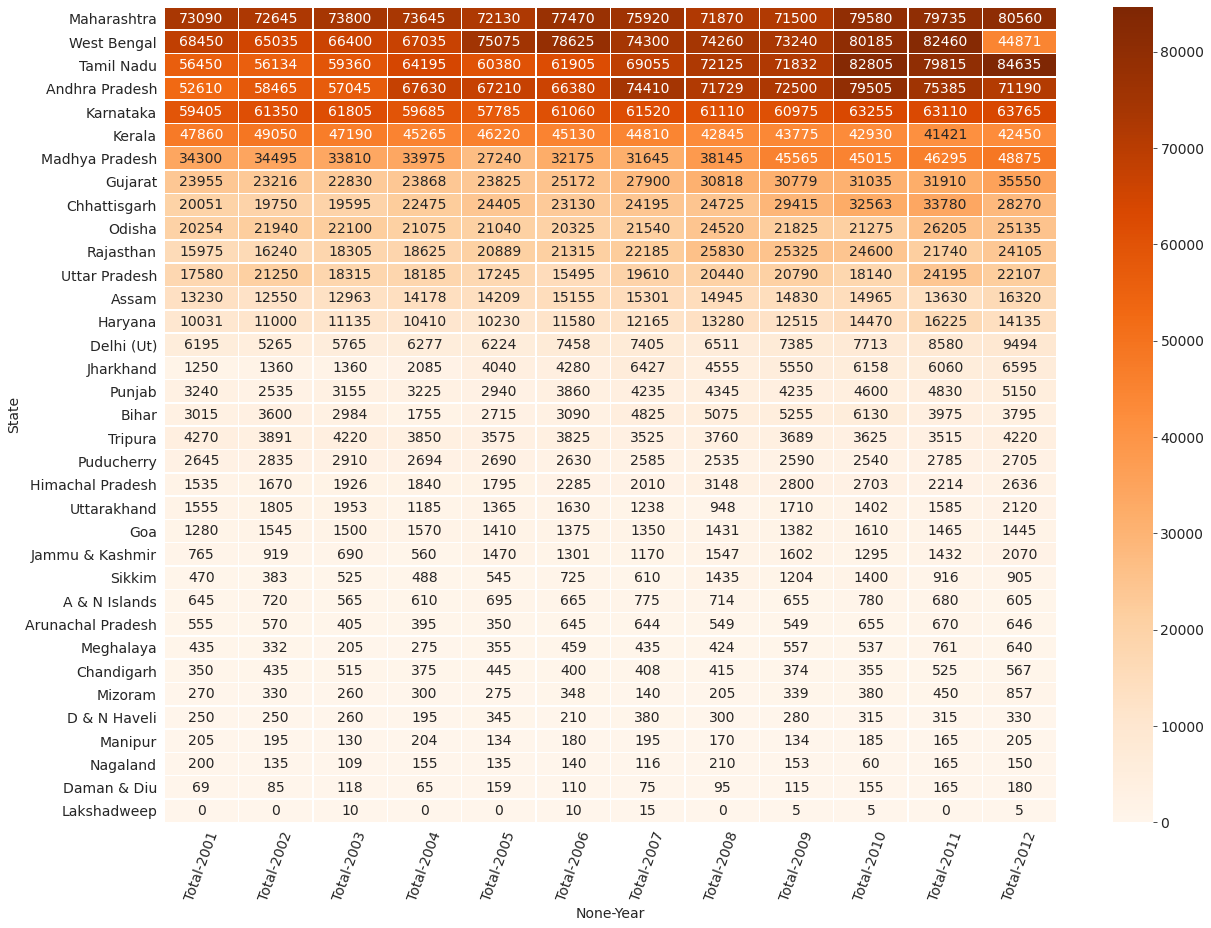

In [25]:
# Creating the heatmap
plt.figure(figsize=(20,15))
plt.xticks(rotation=70)
plt.xlabel('Total for Every Year')
sns.heatmap(final_suicide_heatmap_df, annot=True, fmt='d', linewidths=.5, cmap='Oranges');

Because of the dark color in the heatmap, we know that the top 6 states that have high suicide death are Maharastra, West Bengal, Tamil Nadu, Andhra Pradesh, Karnataka, Kerala.

After seeing this, the state government must have to take some steps to prevent the suicides in their state

### What are the causes

What are the reasons that make people to commit suicide and let's check what are the most reasons to least reason that make people to commit suicide ?

In [31]:
# Let's see the reason's first
print(len(suicide_df[suicide_df.Type_code == 'Causes'].Type.value_counts()), 'Reasons they are... \n')
suicide_df[suicide_df.Type_code == 'Causes'].Type.value_counts()

26 Reasons they are... 



Love Affairs                                      4200
Failure in Examination                            4200
Property Dispute                                  4200
Other Causes (Please Specity)                     4200
Cancer                                            4200
Death of Dear Person                              4200
Paralysis                                         4200
Causes Not known                                  4200
Cancellation/Non-Settlement of Marriage           4200
Physical Abuse (Rape/Incest Etc.)                 4200
Professional/Career Problem                       4200
Insanity/Mental Illness                           4200
Other Prolonged Illness                           4200
Poverty                                           4200
Illness (Aids/STD)                                4200
Bankruptcy or Sudden change in Economic Status    4200
Unemployment                                      4200
Dowry Dispute                                     4200
Suspected/

So now we know there are common 26 reasons that they given in the dataset, and we also have `Other Causes (Please Specify)` so let's neglect and consider as a 25 reasons

Now let's create a table for visualization

In [32]:
# Creating the table for visualization
cause_df = suicide_df[suicide_df.Type_code == 'Causes']
cause_df = cause_df.groupby('Type')['Total'].sum()
cause_comp_df = pd.DataFrame(cause_df).reset_index().sort_values('Total', ascending=False)
cause_comp_df

,Type,Total
10,Family Problems,341952
3,Causes Not known,237069
17,Other Causes (Please Specity),216050
18,Other Prolonged Illness,194565
14,Insanity/Mental Illness,94229
15,Love Affairs,45039
0,Bankruptcy or Sudden change in Economic Status,35410
21,Poverty,32684
6,Dowry Dispute,31970
7,Drug Abuse/Addiction,30046


So now we have every cause and the total number of suicides commit by people from 2001 to 2012, now we can create the visualization for which cause make most of the people to end their life

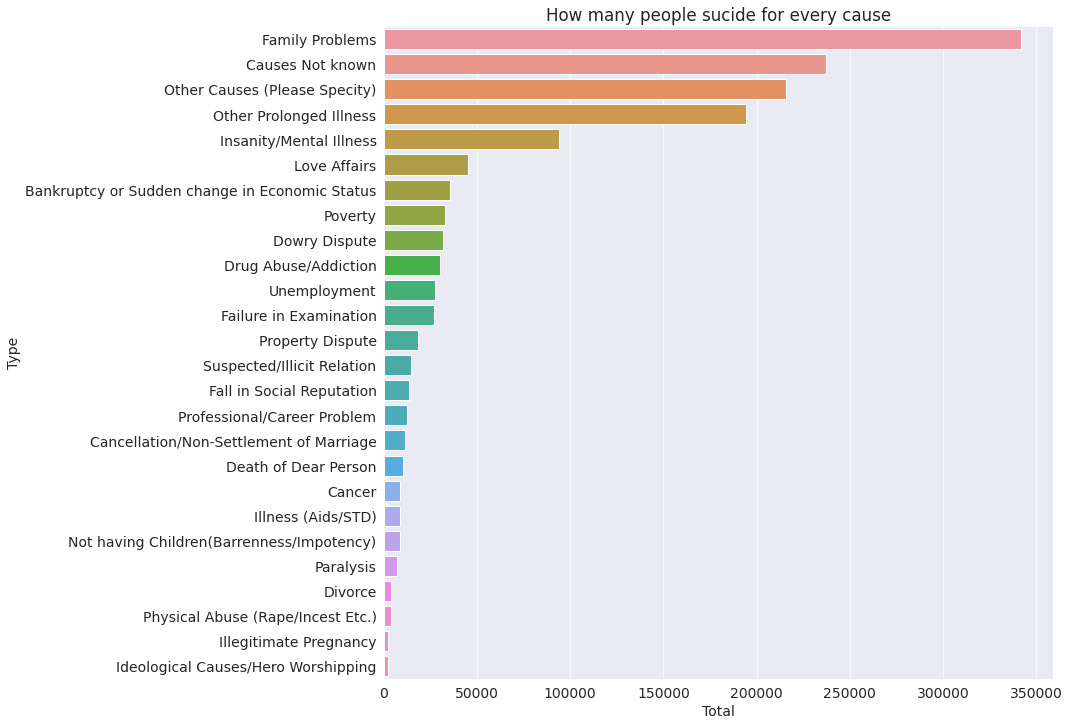

In [34]:
# Creating the table for causes
plt.figure(figsize=(12,12))
plt.title('How many people sucide for every cause')
sns.barplot(x='Total', y='Type', data=cause_comp_df);

As we see in the above chart, now we know most of the people commit suicide because of their family problems, And this needs to be stopped.

Because  that's not a small amount of number, that's huge guys 341,952 is not the smallest number as far as I know

### Social Status

Let's check social status of people, understand and try to find out why...

In [36]:
# Creating the dataframe for visualizing the Social Status
social_status = suicide_df[suicide_df.Type_code == 'Social_Status']
social_status_df = pd.DataFrame(social_status.groupby('Type')['Total'].sum()).reset_index().sort_values('Total', ascending=False)
social_status_df

,Type,Total
1,Married,1021774
2,Never Married,318301
4,Widowed/Widower,62113
3,Seperated,38471
0,Divorcee,15272


By viewing the above table we have the solid understanding that Married people commit suicide than others, now we have a little bit of connection between suicide because of family problems and married people suicide

And the suicide rate of Married people is huge when compared to Never Married people.

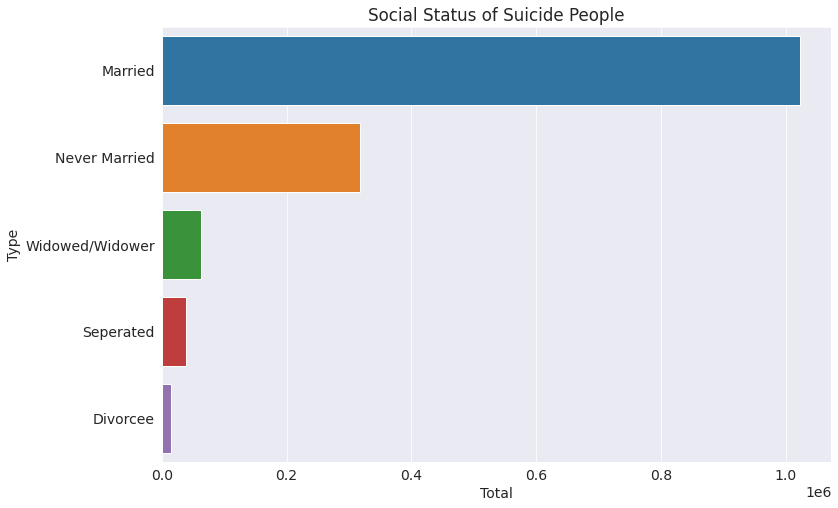

In [37]:
# Creating the visualization for Social Status
plt.figure(figsize=(12,8))
plt.title('Social Status of Suicide People')
sns.barplot(x='Total', y='Type', data=social_status_df);

The Married people counting is two times higher than Never Married people

### Professional Profile

Let's see the professional profile of the people who commit suicide and try to relate with other columns

In [38]:
# Creating the dataset for professional profile
prof_prof_df = suicide_df[suicide_df.Type_code == 'Professional_Profile']
professional_profile_df = pd.DataFrame(prof_prof_df.groupby('Type')['Total'].sum()).reset_index().sort_values('Total', ascending=False)
professional_profile_df

,Type,Total
2,Others (Please Specify),469147
1,House Wife,285243
0,Farming/Agriculture Activity,197923
8,Service (Private),115472
10,Unemployed,114374
6,Self-employed (Business activity),78112
9,Student,74323
3,Professional Activity,39204
4,Public Sector Undertaking,30786
7,Service (Government),23325


It shows Others in the first place because they don't know their job or what they are doing or maybe they more and more job profiles so they take the common one to categories these


Ok, let's view the dataset in the chart...

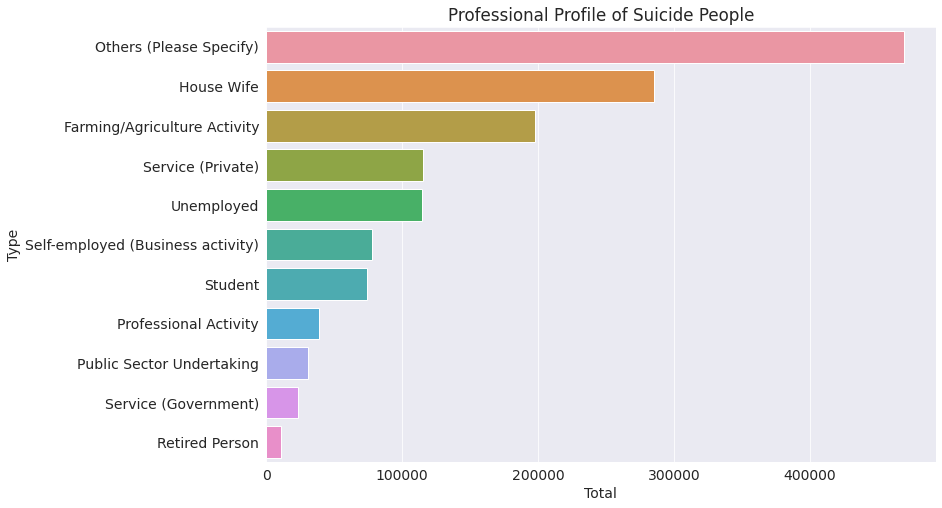

In [39]:
# Creating the visualizatio for Professional Profile
plt.figure(figsize=(12,8))
plt.title("Professional Profile of Suicide People")
sns.barplot(x='Total', y='Type' ,data=professional_profile_df);

See, there is a connection between all the plot, like here is the most person that commits suicide is House Wife. They are married people, they have family problems whatever it is, they don't want to live like this in the world. So they do this ... (I think)

And the other one is Farming/Agriculture Activity, we know this happens and this is all over the media, and I think our government takes some actions to prevent this... But Housewife suicide is because of the family problem have to look in deep.

### Mean Adopt

This section shows the how did they dead... 

If we know this, we are closer to prevent the suicide

In [40]:
# Creating the table for mean adopt
mean_df = suicide_df[suicide_df.Type_code == "Means_adopted"]
mean_adopted_df = pd.DataFrame(mean_df.groupby('Type')['Total'].sum()).reset_index().sort_values('Total', ascending=False)
mean_adopted_df

,Type,Total
5,By Hanging,460955
0,By Consuming Insecticides,275501
1,By Consuming Other Poison,231178
11,By Other means (please specify),135132
4,By Fire/Self Immolation,128006
2,By Drowning,96711
15,By coming under running vehicles/trains,45299
12,By Over Alcoholism,15973
16,By touching electric wires,10816
13,By Overdose of sleeping pills,9960


Most used way to commit suicide is BY Hanging... and By Consuming Insecticides and By Consuming Other Poison...

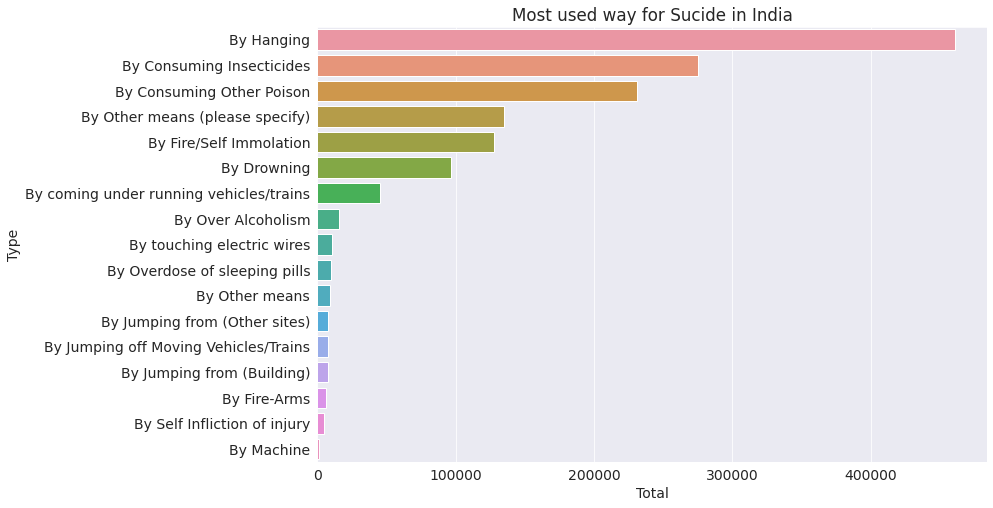

In [41]:
# Let's plot the table 
plt.figure(figsize=(12,8))
plt.title('Most used way for Sucide in India')
sns.barplot(x='Total', y='Type' ,data=mean_adopted_df);

The most used way to commit suicide is BY Hanging... and By Consuming Insecticides and By Consuming Other Poison... By Fire/self-immolation and By Drowning... 

In the plot, we clearly see, that this have more number than others. If we stop these suicide case will be decreased by half.

### Education Qualification

We have to know, are the educated people suicide most or uneducated people suicide the most... If we know this, we also know whether education prevents suicide.

In [42]:
# Creating the dataframe for Educational qualification
education_df = suicide_df[suicide_df.Type_code == 'Education_Status']
education_status_df = pd.DataFrame(education_df.groupby('Type')['Total'].sum()).reset_index().sort_values('Total', ascending=False)
education_status_df

,Type,Total
7,Primary,362827
4,Middle,342971
5,No Education,321757
3,Matriculate/Secondary,256566
2,Hr. Secondary/Intermediate/Pre-Universit,118908
1,Graduate,31274
0,Diploma,14153
6,Post Graduate and Above,7475


As we see, primary education is the least education that people can get, but we know that surely that's not enough.

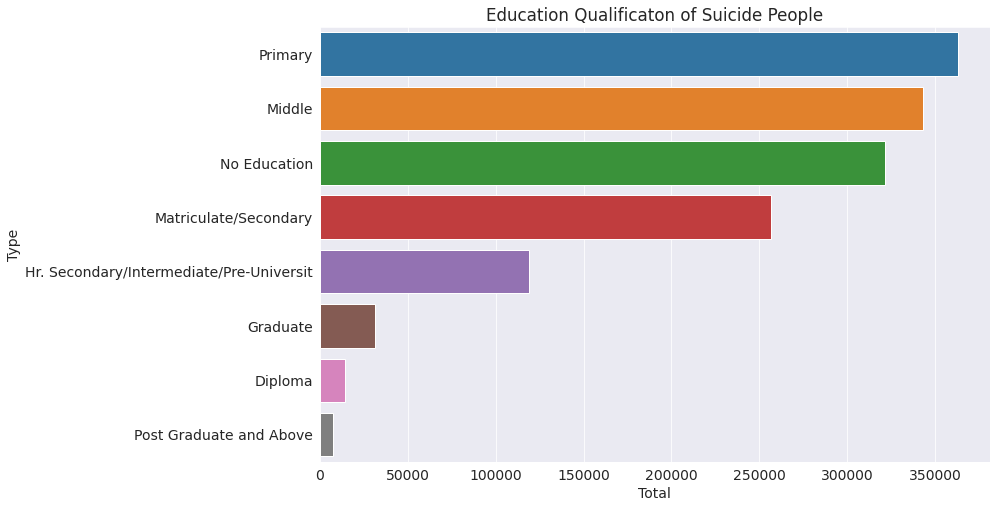

In [43]:
# Creating the plot for Educational Qualification
plt.figure(figsize=(12,8))
plt.title('Education Qualificaton of Suicide People')
sns.barplot(x='Total', y='Type', data=education_status_df);

As we see the plot, we clearly know if you do are a graduate or diploma or PG, you will get the knowledge of taking our life from us is no use, we have to face the problem.

So we need the education to get the picture of our future, so please sent your kids to schools and college, they will learn about what is life, and they won't get a thought about suicide.

### Age Group

Let's see which age group people commit suicide the most compare to another Age Group and compare the relationship to know why

In [44]:
age_df = pd.DataFrame(suicide_df.groupby('Age_group')['Total'].sum()).reset_index()
age_df

,Age_group,Total
0,0-100+,2911862
1,0-14,98410
2,15-29,1534037
3,30-44,1471599
4,45-59,885177
5,60+,346925


It looks like, 0-100+ aged people commit suicide more than others, but that's the common age group for a human being, I think they use the age group for unknown age group or misspelled age group. So ignore it.

Now view this table in the pie chart

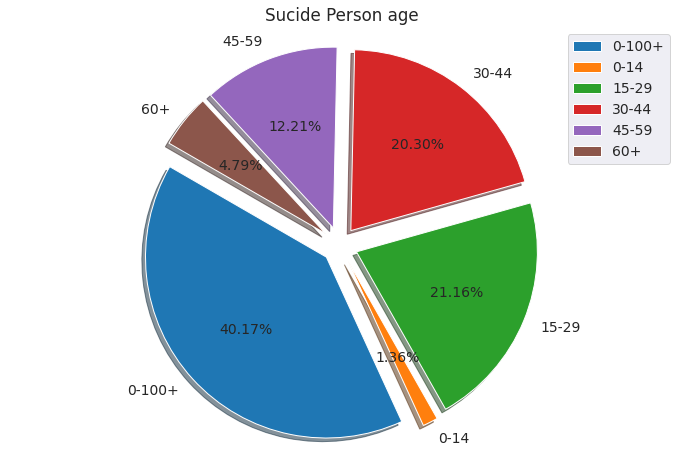

In [45]:
plt.figure(figsize=(12,8))
plt.title('Sucide Person age')
plt.pie(age_df.Total, explode=(0.1,0.1,0.1,0.1,0.1,0.1),labels = age_df.Age_group, autopct='%1.2f%%', shadow= True, startangle=150)
plt.axis('equal')
plt.legend(['0-100+', '0-14', '15-29', '30-44','45-59', '60+']);

So, as we see, Most are from the age of 15 to 29...

* It's because of schools and college, 15 years old boy/girl just finishing the 10th examinations, it's all starting with the 10th class result. Teacher's and Parent's always says "This result is your life, study well, if you fail or get low marks your life won't be good". We have to make them understand "single sheet of paper doesn't decide your life, knowledge is everything. Not the Marksheet"

* Another Reason for commit suicide is love, affair. It's common to fall in love, but not the end of the world.

So the second largest is 30 to 44...
* This was come because of family problems, marriage problems, and money more. They have to get the motivation and love from the right hand.


## Asking and Answering Questions

We analysis and visualize the data in multiple charts, plots and now we have some understanding of what is the relationship between each and every column and rows... So let's try to ask some common question t and answer in the detail visualization and explanation 

**Q1. As we see married people commit suicide most than others, but which year this suicide death number's become most ?**

Her we take only `married` value in Type column, use `groupby` function to group the series, then we convert the series into Dataframe

In [47]:
# Representing the answer in the DataFrame
married = suicide_df[suicide_df.Type == 'Married']
married_df = pd.DataFrame(married.groupby('Year')['Total'].sum()).reset_index().sort_values('Total', ascending=False)
married_df

,Year,Total
11,2012,95264
10,2011,95015
9,2010,93207
8,2009,89492
7,2008,87863
6,2007,87657
5,2006,85321
4,2005,80671
3,2004,79668
2,2003,77148


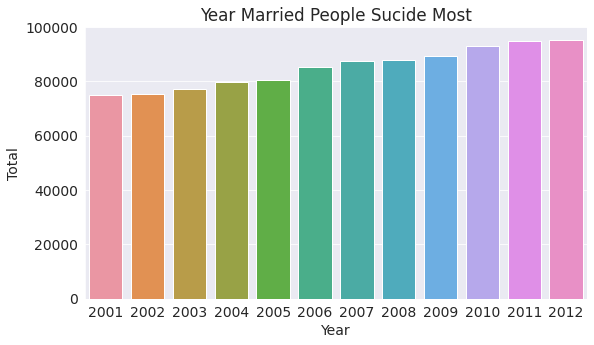

In [48]:
plt.title('Year Married People Sucide Most')
sns.barplot(x='Year', y= 'Total', data=married_df);

As we see the table and barplot, both shows every year number of suicide is keep increasing from the start to end

**Q2. How many people commit because of physical abuse? compare both male and female and show for every state from 2001 to 2012**

Here we are going to filter only `Physical Abuse (Rape/Incest Etc.)` values in the Type column and use groupby function  to group `State` and `Gender` then use the `sort_values` function to sort Total values in descending 


In [49]:
# Creating the tabel for physcial abuse for every state and gender
physical_abuse = suicide_df[suicide_df.Type == 'Physical Abuse (Rape/Incest Etc.)']
physical_abuse_df = pd.DataFrame(physical_abuse.groupby(['State', 'Gender'])['Total'].sum()).reset_index().sort_values('Total', ascending= False)
physical_abuse_df

,State,Gender,Total
38,Madhya Pradesh,Female,1035
39,Madhya Pradesh,Male,401
40,Maharashtra,Female,323
12,Chhattisgarh,Female,279
22,Gujarat,Female,168
...,...,...,...
44,Meghalaya,Female,0
43,Manipur,Male,0
42,Manipur,Female,0
1,A & N Islands,Male,0


When we see the table we know, Madhya Pradesh has the highest number in physical abuse, but we don't have a clear view about the second and third states, so let's plot a bar plot to understand

In [57]:
# Printing the answer
print(physical_abuse_df.Total.sum(), 'people commit suicide in every state because of physical abuse')

3992 people commit suicide in every state because of physical abuse


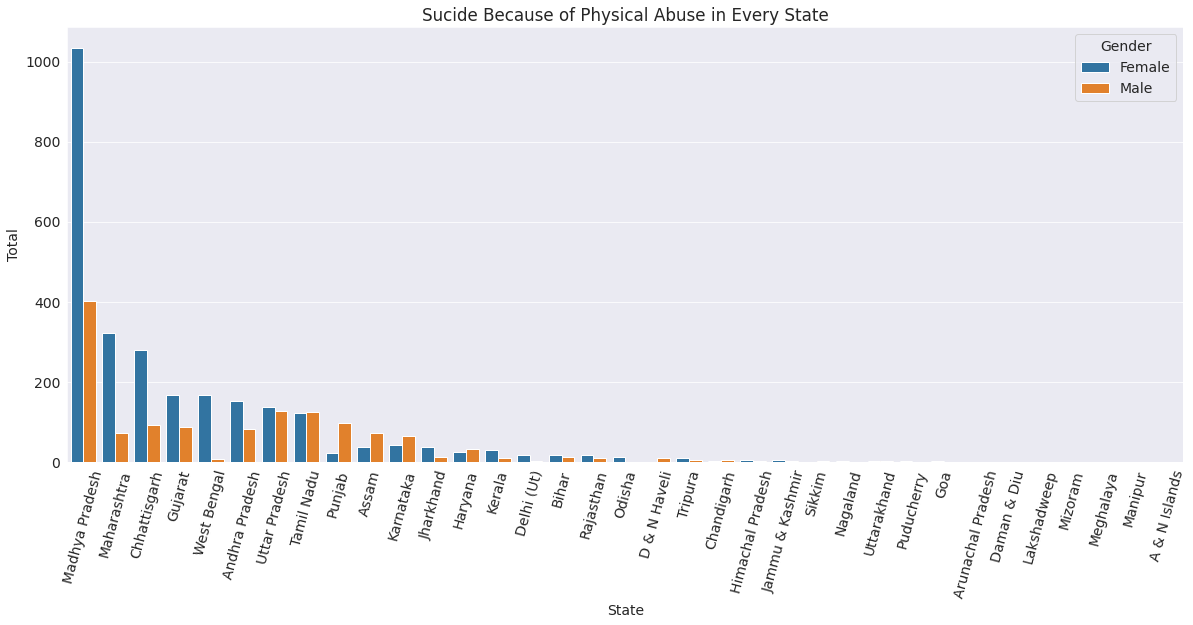

In [50]:
# Creating the barplot for physical abuse for every state and gender
plt.figure(figsize=(20, 8))
plt.xticks(rotation=75)
plt.title('Sucide Because of Physical Abuse in Every State')
sns.barplot(x='State', y='Total', hue='Gender', data=physical_abuse_df);

* Now we can see clearly, that Madhya Pradesh has a very high number of suicides because of physical abuse.

* *Madhya Pradesh, Maharashtra, Chattisgarh, Gujarat, West Bengal, Andhra Pradesh* have a high number for female physical abuse

* *Uttar Pradesh, Tamil Nadu* have a nearly equal number of male and female physical abuse

* *Punjab, Assam, Karnataka* these states have male abuse more than female abuse...

* The Government of the each state understand why this happening and prevent these kind of monstrous behavior to happening

**Q3. Which age group people suicide mostly because of physical abuse? and show with gender, Male and Female.**

Here we are going to filter only `Physical Abuse (Rape/Incest Etc.)` values in the Type column and use groupby function to group `Age_group` and `Gender` and add the `Total` value for every age group and gender then use the `sort_values function` to sort `Total` values in descending

In [51]:
# Creating the dataframe or table for  physical abuse for every age group
physical_abuse_age = suicide_df[suicide_df.Type == 'Physical Abuse (Rape/Incest Etc.)']
physical_abuse_age_df = pd.DataFrame(physical_abuse.groupby(['Age_group', 'Gender'])['Total'].sum()).reset_index().sort_values('Total', ascending= False)
physical_abuse_age_df

,Age_group,Gender,Total
2,15-29,Female,1566
4,30-44,Female,754
3,15-29,Male,499
5,30-44,Male,485
7,45-59,Male,236
6,45-59,Female,194
0,0-14,Female,101
9,60+,Male,91
8,60+,Female,47
1,0-14,Male,19


With the above tabe, Females are the most people commit suicide because of physical abuse and they are mainly in the age of 15 to 44

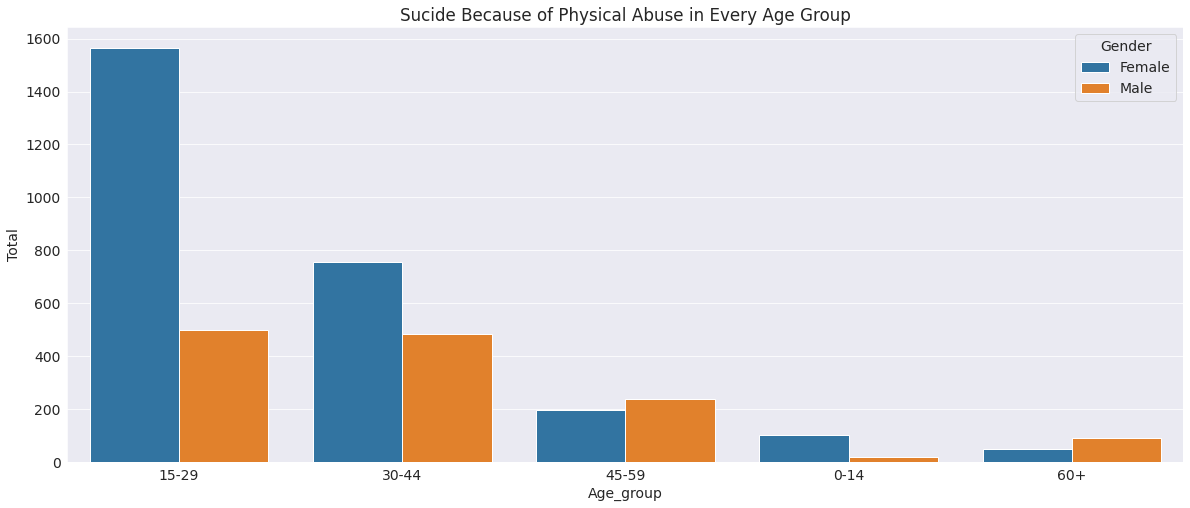

In [54]:
# Creatng a baplot for physical abuse for every age group
plt.figure(figsize=(20, 8))
plt.title('Sucide Because of Physical Abuse in Every Age Group')
sns.barplot(x='Age_group', y='Total', hue='Gender', data=physical_abuse_age_df);

* If you see the above barplot, females from age of 15 to 29 teenage people are the most victims...

* I consider this is the biggest crime, that one can do, this type of activity not only hurt physically, this also affects their mental health.

* So please consider to product women and men from this kind of activities

* I heard government take actions in this situation, but that's not enough the punishment must be cruel than any other punishment in the world

**Q4. How many children suicide because of falilure in examination? in each state and show for every gender**

Here we are going to filter only `Failure in Examination` values in the Type column and use groupby function to group `Age_group` and `State` and add the `Total` value for every age group and gender then use the `sort_values function` to sort `Total` values in descending

In [58]:
# Creating the dataframe for suicide commits because of failure in examination
not_pass = suicide_df[suicide_df.Type == 'Failure in Examination']
failure_df = pd.DataFrame(not_pass.groupby(['State', 'Age_group'])['Total'].sum()).reset_index().sort_values('Total', ascending=False)
failure_df

,State,Age_group,Total
171,West Bengal,15-29,3909
101,Maharashtra,15-29,2969
6,Andhra Pradesh,15-29,2120
151,Tamil Nadu,15-29,2037
81,Karnataka,15-29,1472
...,...,...,...
115,Mizoram,0-14,0
114,Meghalaya,60+,0
113,Meghalaya,45-59,0
112,Meghalaya,30-44,0


Now we have some idea, that Age_group of 15-29 are the student commit suicide most because of Failure in Examination

In [71]:
# Printing the answer
print(failure_df.Total.sum(), "People's commit suicide because of failure in examinatin")

27005 People's commit suicide because of failure in examinatin


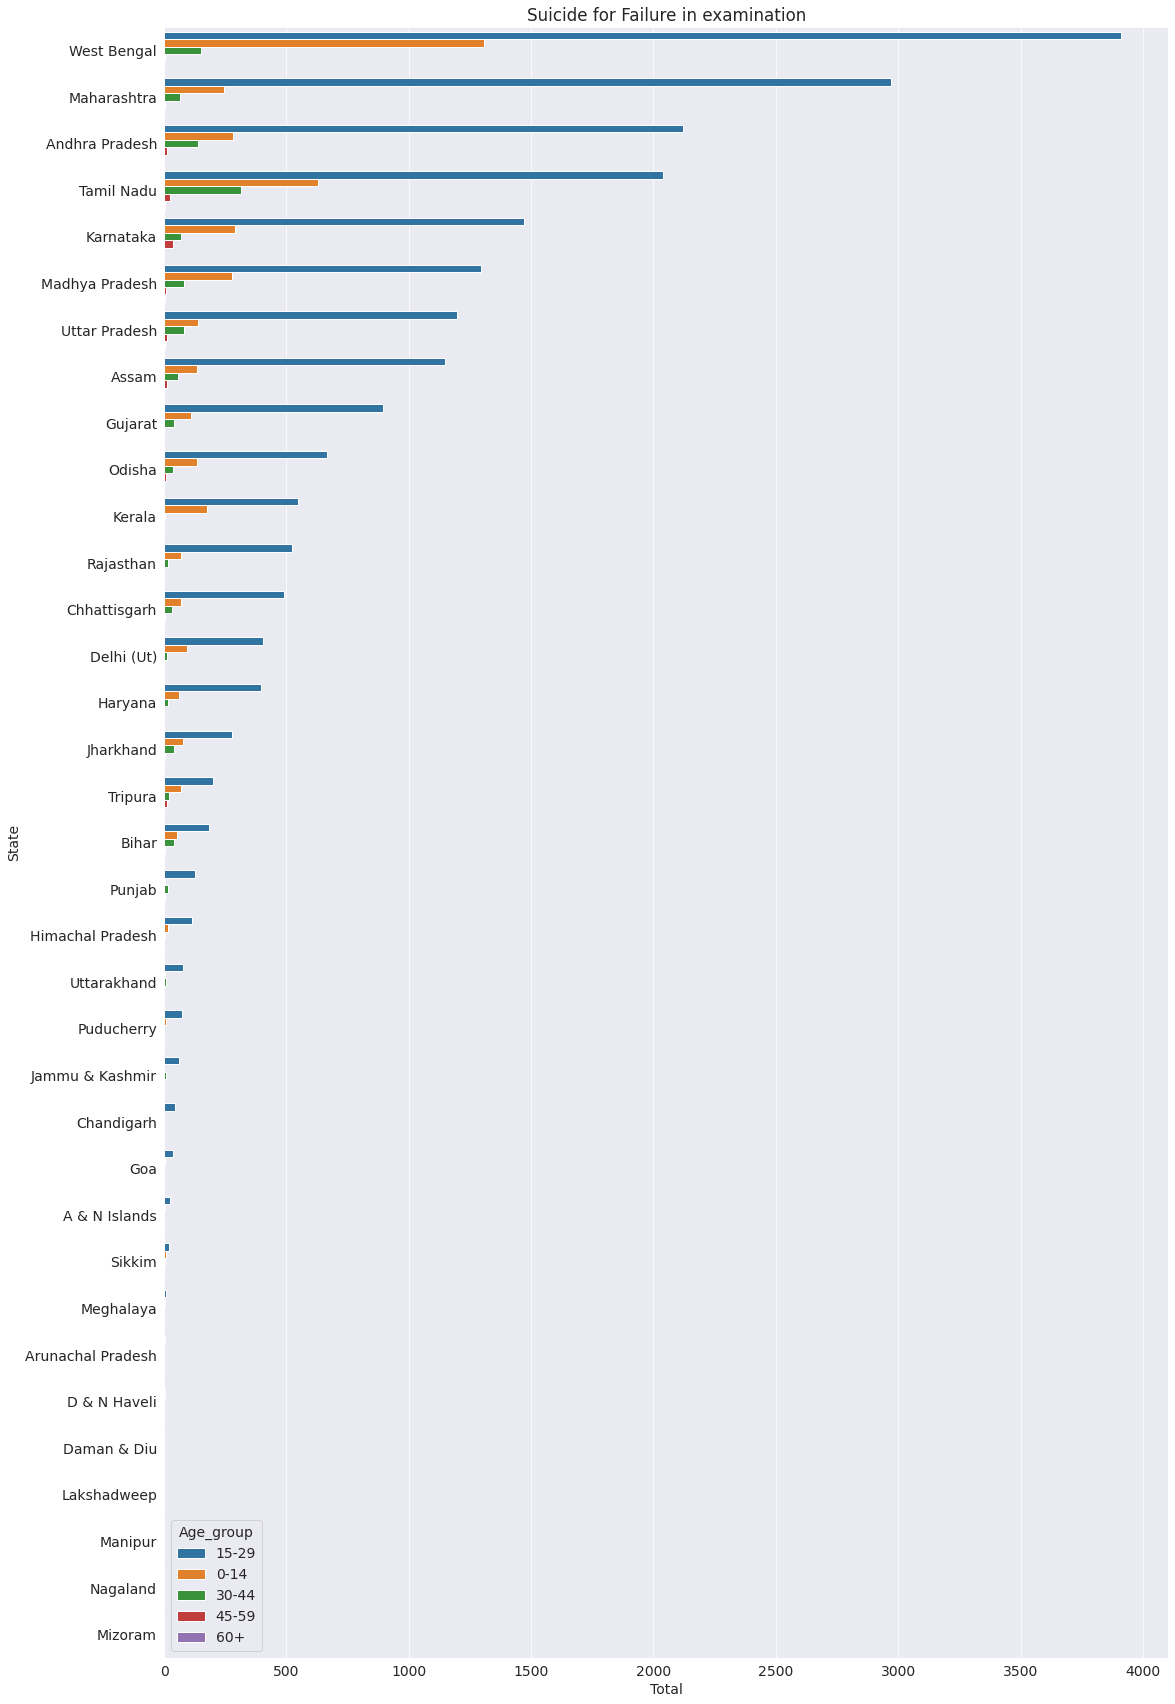

In [75]:
# Plotting the graph for suicide commit because of Failure in examination
plt.figure(figsize=(18,30))
plt.title('Suicide for Failure in examination')

sns.barplot(x='Total', y='State', hue='Age_group', data=failure_df);

* As we see the above huge barplot, `West Bengal`, `Maharashtra`, `Andhra Pradesh`, `Tamil Nadu`.and lot more

* Every Teacher's and Parent's must stop repeating the useless examination is your life, you have to pass it. Instead of repeating this useless words, they have to repeat 'Knowledge is everything' and help the student to discover his/her interest

**Q5. We know people suicide moslty because of `Family Problems` but which gender are the victims? show for every year**

Here we are going to filter only `Family Problems` values in the Type column and use groupby function to group `Year` and `Gender` and add the `Total` value for every age group and gender then use the `sort_values function` to sort `Total` values in descending

In [72]:
# Creating the dataframe or Table for Victims for Family Problems
family = suicide_df[suicide_df.Type == 'Family Problems']
family_df = pd.DataFrame(family.groupby(['Year', 'Gender'])['Total'].sum()).reset_index()
family_df

,Year,Gender,Total
0,2001,Female,10263
1,2001,Male,13899
2,2002,Female,10333
3,2002,Male,14752
4,2003,Female,10530
5,2003,Male,15778
6,2004,Female,10207
7,2004,Male,15324
8,2005,Female,10084
9,2005,Male,15357


With the above table we don't get the clear view of which gender commit suicide because of family problems so let's view in the barplot

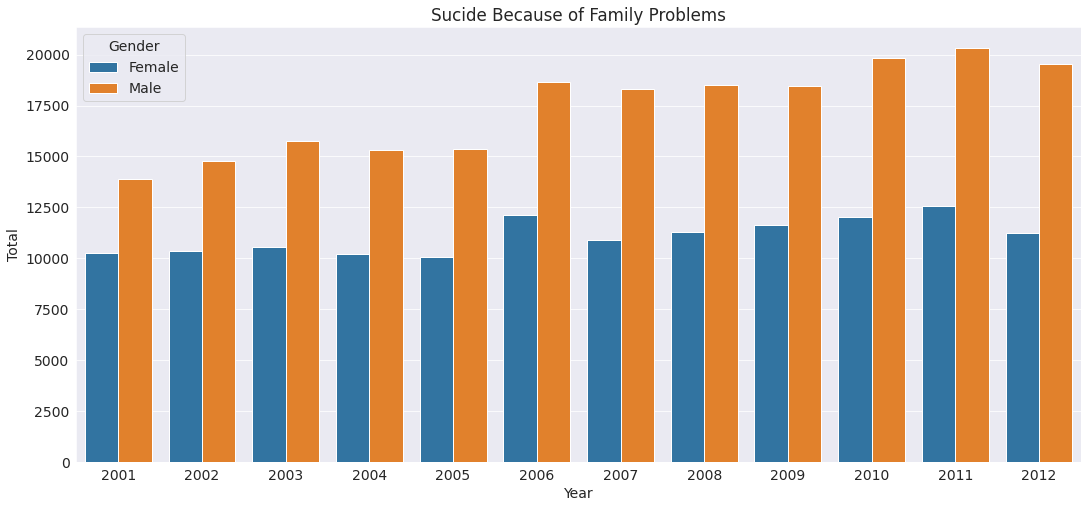

In [73]:
# plotting a graph for family problems
plt.figure(figsize=(18, 8))
plt.title('Sucide Because of Family Problems')
sns.barplot(x= 'Year', y='Total', hue='Gender', data=family_df);

Now we have the clear view, Male are the victim and they are the people who commit suicide for family problems for every week

* This will happen because of responsibilities
* They may be unable to finance their family so they may be done this to themself...

## Inferences and Conclusion


The main goal of the analysis project is to analyze the suicide cases, which means why, who, how, when, where these suicides happens
We have most of the answers.

Let's see some of the important points that we understand from our Datasets.

1. More than **seven million people** commit suicide from 2001 to 2012.

2. And the total number's suicide victims are **dramatically increased** in every state and for every year... There is no decrease in the number's

3. We concluded the pie chart that shows male was the overall percentage of suicide that happens all-over India.

4. We see the causes for suicide, and we understand Family Problems was the most common cause that takes more than three hundred forty thousand peoples life and we also see most of the victims are married, Male.

5. We also see how important is education to avoid suicide because most of the graduates, diplomas, and postgraduate degree holders suicide total is very lower than compared to primary and No Education background. So having an education is not going to waste.

6. We also see suicide percentage in every age and compare that with Causes that have Failure in Examination to understand 15 to 29 age group people are suicide most because of failure in schools and college examination and we give feedback to Teachers and Parents 'Don't teach your child to follow the marks, teach them to follow the knowledge'.

7. And we see how many people are suicide because of physical abuse and we see for every gender, every state, every age group, then find out age group from 15 to 44 female victims are commit suicide most. And we give the feedback to make the punishment is cruel than anything because this won't affect the person's body and health it affects their mental health. So punishment must be cruel.

## References and Future Work

### References

1. For Data Anaysis with Python Course - [Jovian.ai](https://jovian.ai/)

1. For Numpy - [Numpy Documentation](https://numpy.org/doc/stable/user/quickstart.html)
2. For Pandas - [Pandas Documentation](https://pandas.pydata.org/docs/getting_started/index.html)
3. Matplotlib - [Matplotlib Documentation](https://matplotlib.org/users/index.html)
4. Seaborn - [Seaborn Documentation](https://seaborn.pydata.org/tutorial.html)
5. DataSet - [Kaggle](https://www.kaggle.com/)
6. Check my more detailed blog post in Medium - [Medium Blog Post](https://kannanravi.medium.com/analyzing-suicides-in-india-2001-2012-e074e8c1a21f)

### Future Work

* Want to know about the difference between 2001 to 2012 and 2013 to 2021 - What is it changed, is there any decrement in suicide total or it still increments. 

* Want to explore every field or causes why this happens and how we can prevent it in future

* Want to work in the women safety regarding to physical abuse and prevent that from happening in future